## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

https://www.kaggle.com/janmejaybhoi/cotton-disease-dataset

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto(log_device_placement=True)
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87916544/87910968 [==============================] - 32s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 80s 1s/step - loss: 2.2205 - accuracy: 0.7601 - val_loss: 0.9657 - val_accuracy: 0.7778
Epoch 2/20
61/61 [==============================] - 63s 1s/step - loss: 0.7393 - accuracy: 0.8744 - val_loss: 0.6850 - val_accuracy: 0.8889
Epoch 3/20
61/61 [==============================] - 65s 1s/step - loss: 0.8229 - accuracy: 0.8836 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 67s 1s/step - loss: 0.5428 - accuracy: 0.9154 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 64s 1s/step - loss: 0.5610 - accuracy: 0.9267 - val_loss: 0.2413 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 65s 1s/step - loss: 0.5070 - accuracy: 0.9262 - val_loss: 0.2130 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 65s 1s/step - loss: 0.7445 - acc

In [15]:
import matplotlib.pyplot as plt

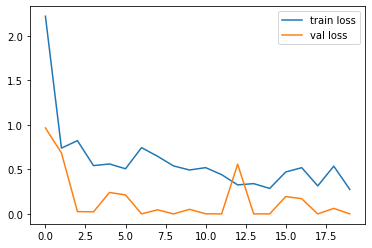

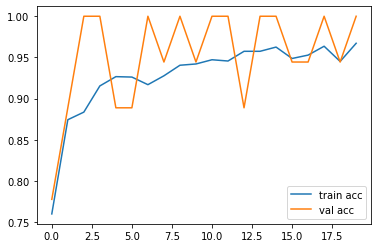

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [4.5952581e-14, 1.2839675e-10, 2.5446671e-19, 1.0000000e+00],
       [4.6997140e-28, 0.0000000e+00, 1.0000000e+00, 2.5305388e-38],
       [4.6322874e-37, 1.0000000e+00, 3.1659934e-28, 2.6931671e-17],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5900552e-21],
       [4.2618453e-17, 3.6086897e-14, 1.0000000e+00, 3.0140056e-18],
       [2.7175483e-28, 1.6563090e-25, 6.8266277e-28, 1.0000000e+00],
       [6.8893441e-18, 3.9104473e-29, 1.0000000e+00, 2.4151801e-17],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.7523004e-36, 7.3264988e-36, 0.0000000e+00],
       [1.1034698e-24, 9.9999917e-01, 2.7043732e-19, 8.5225190e-07],
       [0.0000000e+00, 6.3699332e-23, 0.0000000e+00, 1.0000000e+00],
       [1.7375498e-28, 1.6439149e-10, 1.5926907e-20, 1.0000000e+00],
       [3.5055528e-16, 2.9195556e-20, 1.0000000e+00, 3.9001254e-13],
       [4.2004306e-03, 2.3872945e-

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([3, 3, 2, 1, 1, 2, 3, 2, 1, 0, 1, 3, 3, 2, 2, 1, 0, 0], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [25]:
img=image.load_img('Datasets/test/diseased cotton plant/dd (41).jpg',target_size=(224,224))



In [26]:
x=image.img_to_array(img)
x

array([[[ 97.,  82.,  61.],
        [ 71.,  59.,  37.],
        [ 98.,  83.,  62.],
        ...,
        [ 89., 149.,  63.],
        [ 91., 154.,  63.],
        [ 92., 154.,  68.]],

       [[ 63.,  54.,  37.],
        [ 54.,  46.,  33.],
        [ 68.,  59.,  42.],
        ...,
        [ 88., 150.,  64.],
        [ 89., 152.,  63.],
        [ 82., 144.,  58.]],

       [[ 48.,  38.,  26.],
        [ 58.,  49.,  34.],
        [ 76.,  67.,  50.],
        ...,
        [ 93., 153.,  67.],
        [ 82., 145.,  56.],
        [ 90., 150.,  64.]],

       ...,

       [[ 54.,  47.,  29.],
        [ 52.,  47.,  28.],
        [ 57.,  50.,  32.],
        ...,
        [ 38.,  38.,  26.],
        [ 36.,  34.,  22.],
        [ 50.,  46.,  34.]],

       [[ 58.,  51.,  35.],
        [ 34.,  31.,  14.],
        [ 50.,  44.,  28.],
        ...,
        [ 68.,  62.,  46.],
        [ 41.,  38.,  23.],
        [ 44.,  38.,  26.]],

       [[ 63.,  69.,  35.],
        [ 41.,  38.,  21.],
        [ 29.,  

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [15]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [16]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [17]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])

In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.2.0'